# KIAM8

## Task 1 - Data Analysis and Preprocessing

Objective: Prepare clean, feature-rich datasets ready for modeling by exploring the data, engineering meaningful features, and handling class imbalance.

In [1]:
"""
Exploratory Data Analysis for Credit Card Data
"""
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [2]:
# Load Scripts Path to Ensure Modules are Accessible
import sys
import os

cwd = os.getcwd()
scripts_path  = os.path.join(cwd, '..', 'scripts')
scripts_abs_path = os.path.abspath(scripts_path)
if scripts_abs_path not in sys.path and os.path.isdir(scripts_abs_path):
    sys.path.insert(0, scripts_abs_path)
    print('Scripts Path Added')
else:
    print('Scripts Path Already Exists')

Scripts Path Added


In [3]:
# Load Scripts

import data_loading as dl
import data_cleaning as dp


In [4]:
file_path = '../data/raw/creditcard.csv'

# Load Data

df = dl.load_data(file_path)

DATA OVERVIEW
Shape: (284807, 31)

First few rows:
   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9       V10       V11       V12       V13       V14  \
0  0.098698  0.363787  0.090794 -0.551600 -0.617801 -0.991390 -0.311169   
1  0.085102 -0.255425 -0.166974  1.612727  1.065235  0.489095 -0.143772   
2  0.247676 -1.514654  0.207643  0.624501  0.066084  0.717293 -0.165946   
3  0.377436 -1.387024 -0.054952 -0.226487  0.178228  0.507757 -0.287924   
4 -0.270533  0.817739  0.753074 -0.822843  0.538196  1.345852 -1.119670   

        V15


CLASS DISTRIBUTION ANALYSIS

 Data Class Distribution:
Class
0    284315
1       492
Name: count, dtype: int64
rate: 0.17%


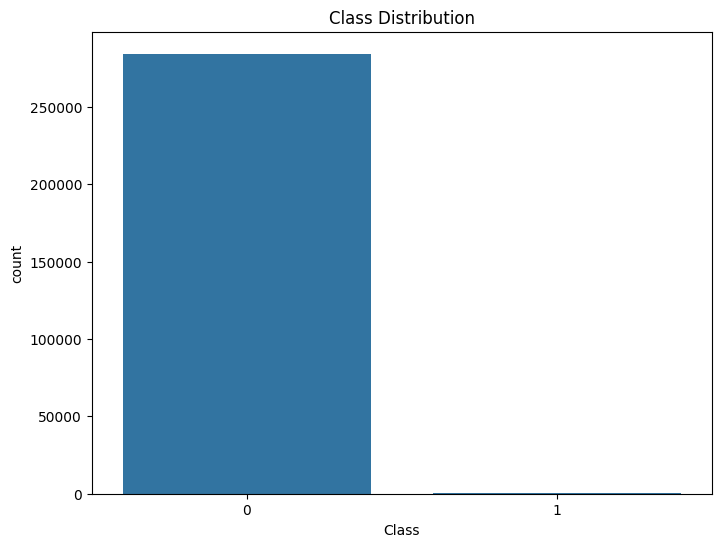

In [5]:
# Class Distribution Before Cleaning

dl.rate_dist(df, 'Class')

In [17]:
#Clean Data
df_cleaned = dp.clean_creditcard_data(df)

Starting credit card data cleaning...

Missing values before cleaning:
Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

Missing values after cleaning:
Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

Duplicates before: 1081
Duplicates after: 0

Final shape: (283726, 31)

Cleaned data saved successfully!


In [20]:
df_cleaned.columns = df_cleaned.columns.str.lower()
df_cleaned.head()

,time,v1,v2,v3,v4,v5,v6,v7,v8,v9,v10,v11,v12,v13,v14,v15,v16,v17,v18,v19,v20,v21,v22,v23,v24,v25,v26,v27,v28,amount,class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


UNIVARIATE ANALYSIS


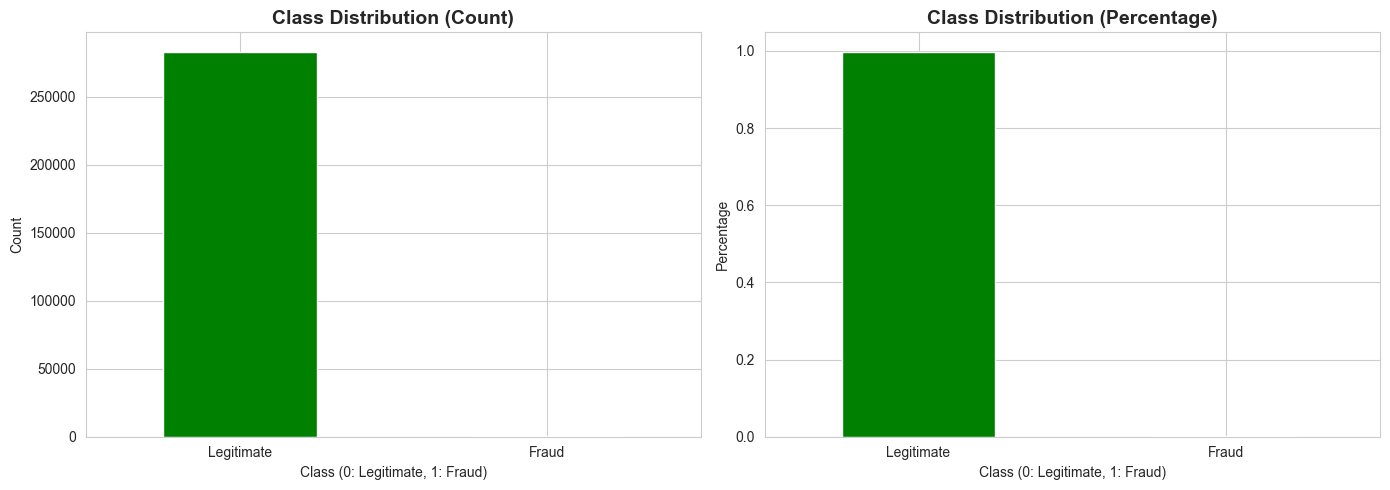

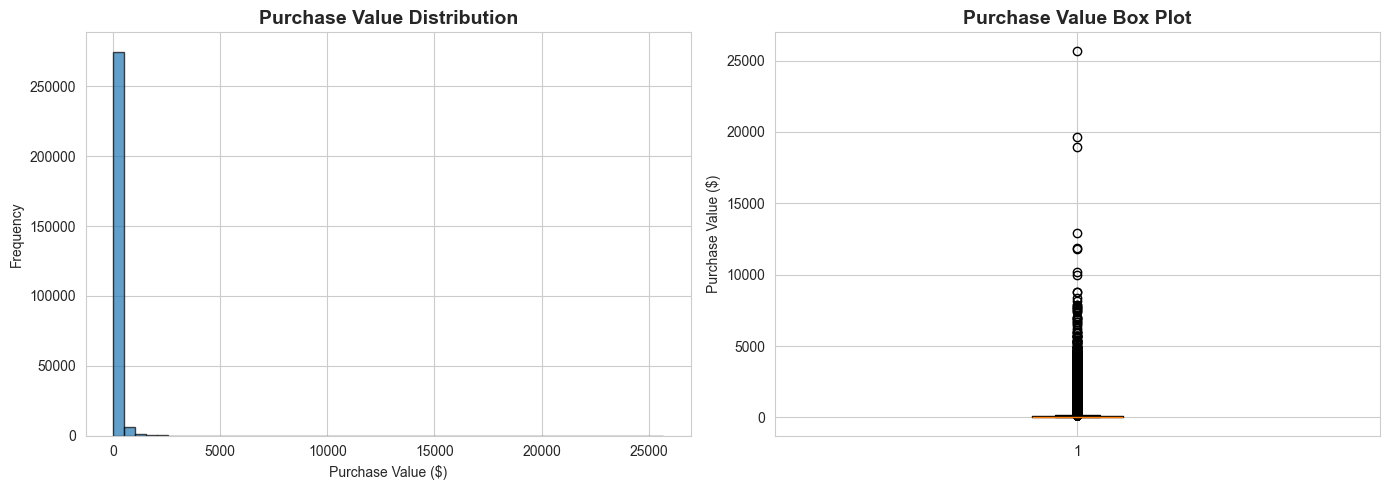


Purchase Value Statistics:
count    283726.000000
mean         88.472687
std         250.399437
min           0.000000
25%           5.600000
50%          22.000000
75%          77.510000
max       25691.160000
Name: amount, dtype: float64

BIVARIATE ANALYSIS


C:\Users\henokt\AppData\Local\Temp\ipykernel_39200\318396179.py:74: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[1].set_xticklabels(['Legitimate', 'Fraud'])


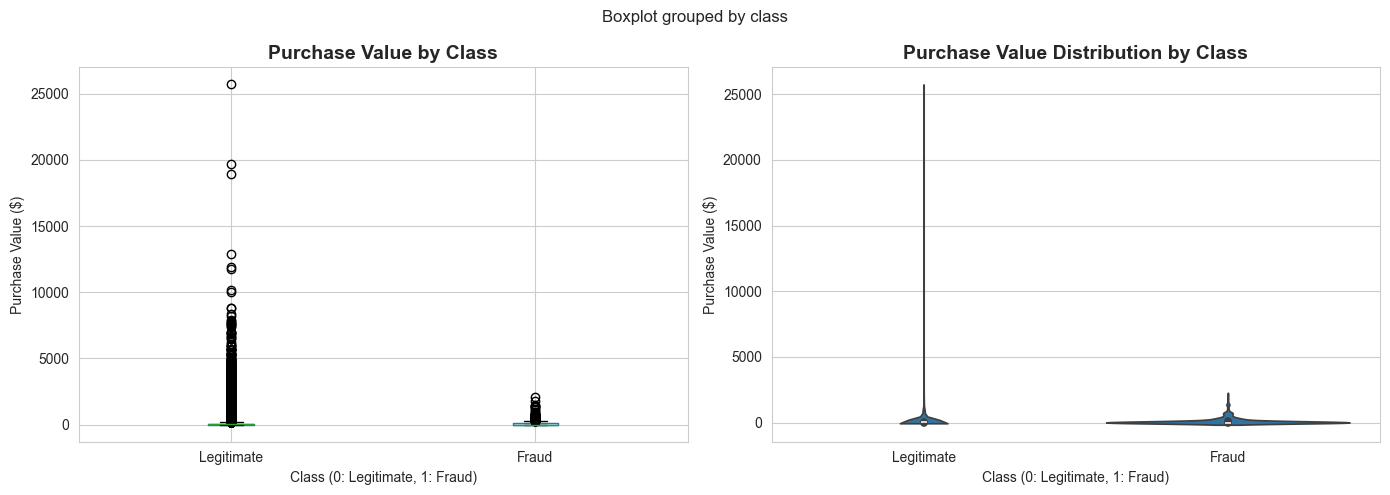


T-test for amount by class:
T-statistic: -3.0772, P-value: 0.0021


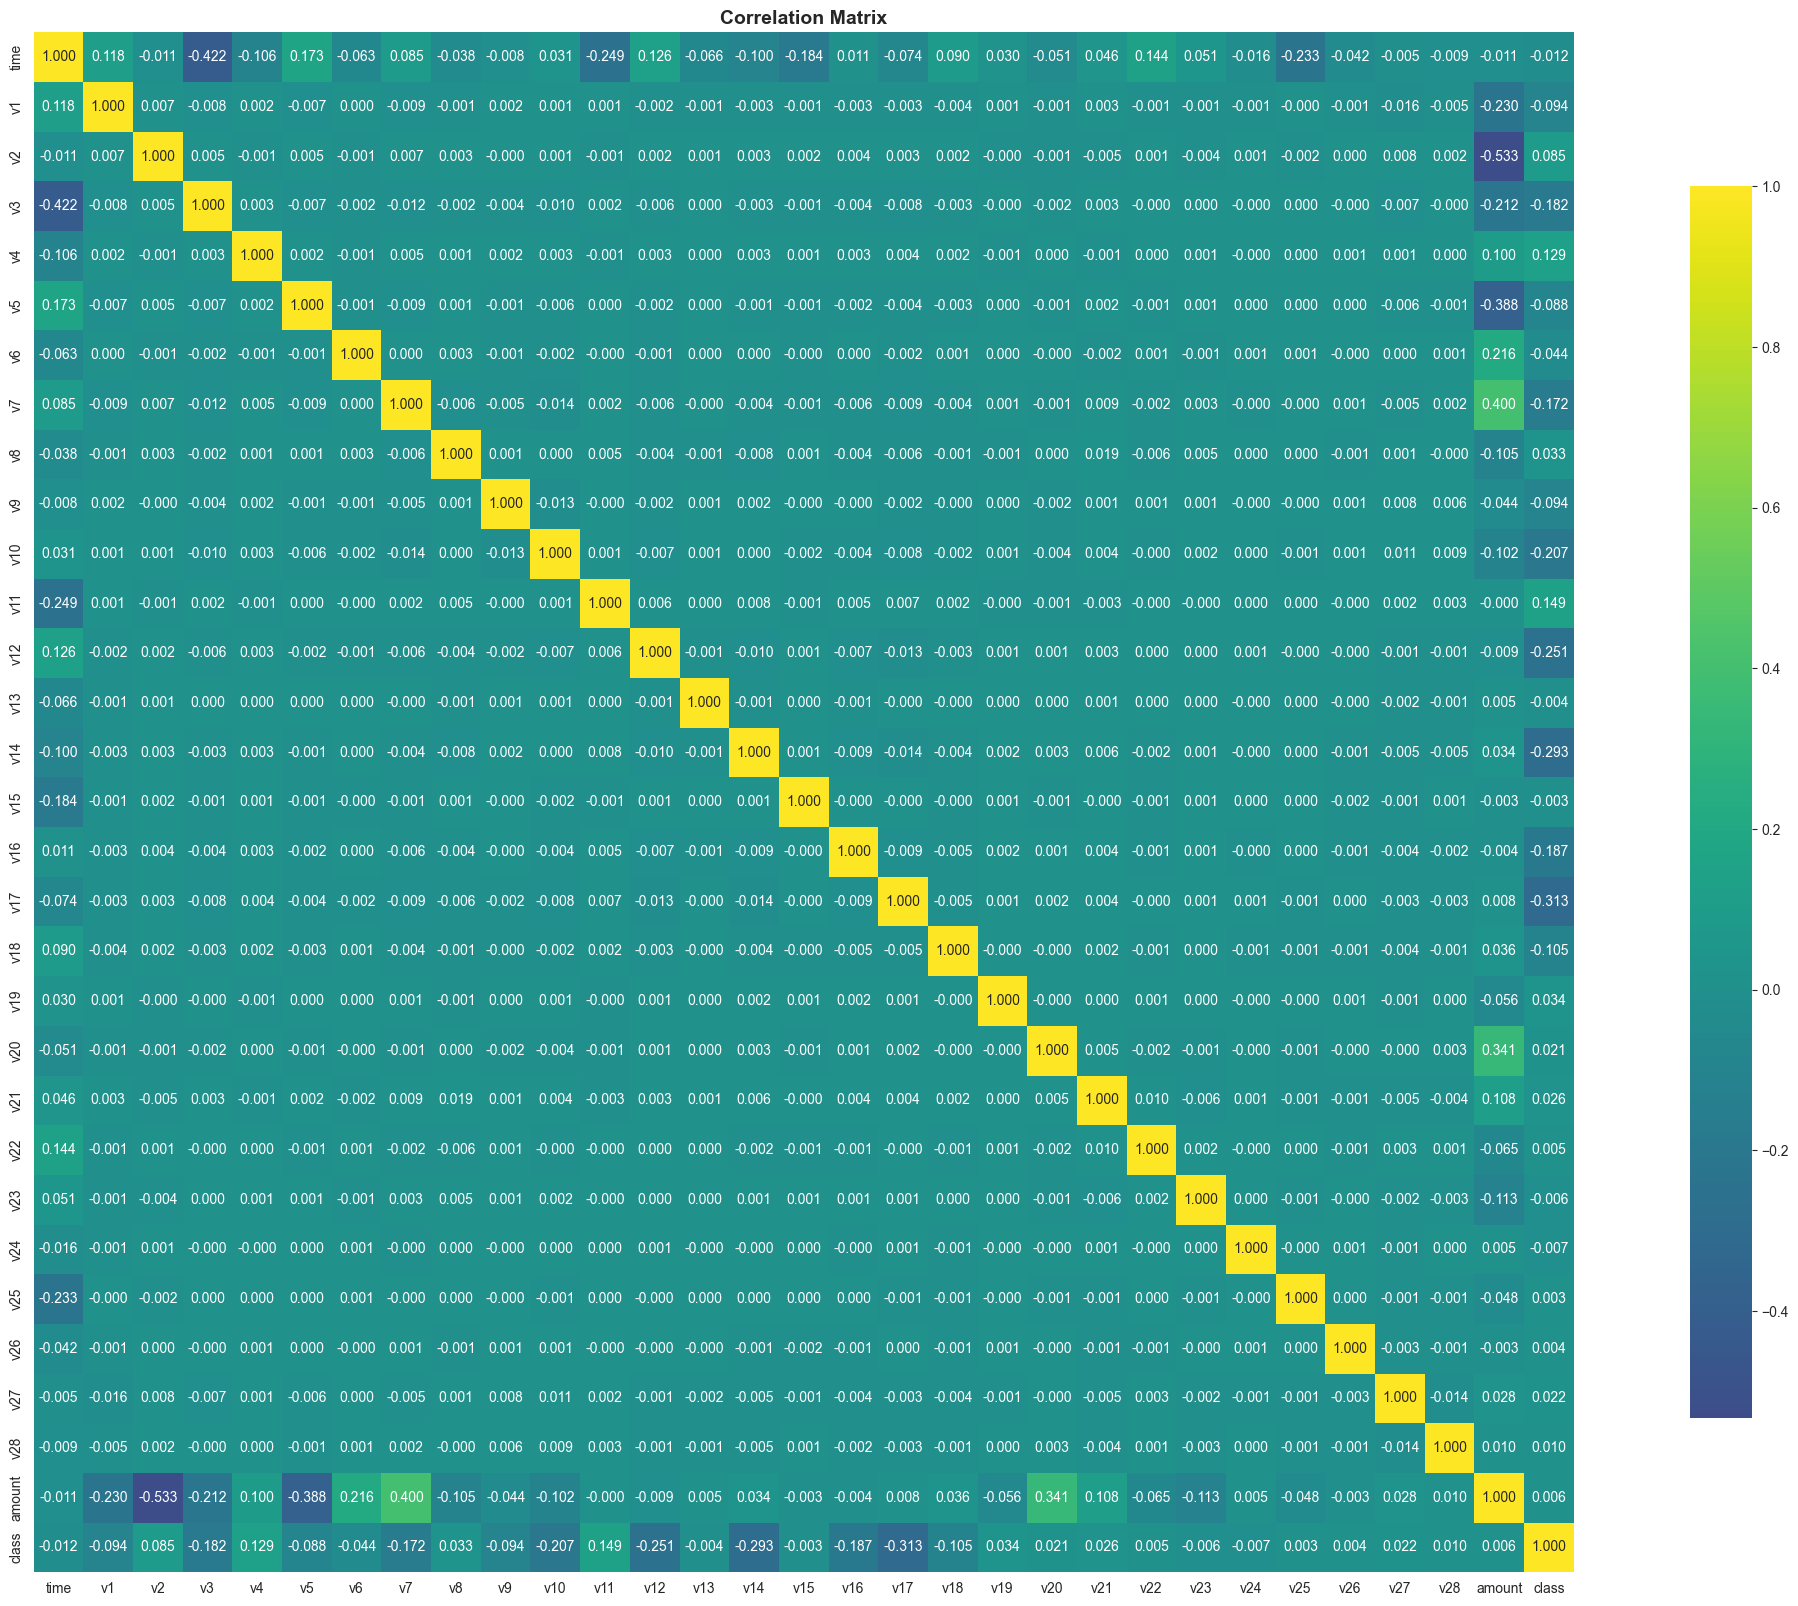


KEY INSIGHTS FROM EDA
1. Class Imbalance Ratio: 598.84:1
2. Mean Purchase Value (Legitimate): $88.41
3. Mean Purchase Value (Fraud): $123.87


In [23]:
# Set style
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)


# ========== UNIVARIATE ANALYSIS ==========
print("="*60)
print("UNIVARIATE ANALYSIS")
print("="*60)

# 1. Class Distribution
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Count plot
df_cleaned['class'].value_counts().plot(kind='bar', ax=axes[0], color=['green', 'red'])
axes[0].set_title('Class Distribution (Count)', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Class (0: Legitimate, 1: Fraud)')
axes[0].set_ylabel('Count')
axes[0].set_xticklabels(['Legitimate', 'Fraud'], rotation=0)

# Percentage plot
df_cleaned['class'].value_counts(normalize=True).plot(kind='bar', ax=axes[1], color=['green', 'red'])
axes[1].set_title('Class Distribution (Percentage)', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Class (0: Legitimate, 1: Fraud)')
axes[1].set_ylabel('Percentage')
axes[1].set_xticklabels(['Legitimate', 'Fraud'], rotation=0)

plt.tight_layout()
plt.savefig('figures/class_distribution_Credit_Card.png', dpi=300, bbox_inches='tight')
plt.show()

# 2. Purchase Value Distribution
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Histogram
axes[0].hist(df_cleaned['amount'], bins=50, edgecolor='black', alpha=0.7)
axes[0].set_title('Purchase Value Distribution', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Purchase Value ($)')
axes[0].set_ylabel('Frequency')

# Box plot
axes[1].boxplot(df_cleaned['amount'])
axes[1].set_title('Purchase Value Box Plot', fontsize=14, fontweight='bold')
axes[1].set_ylabel('Purchase Value ($)')

plt.tight_layout()
plt.savefig('figures/credit_card_purchase_value_dist.png', dpi=300, bbox_inches='tight')
plt.show()

print(f"\nPurchase Value Statistics:\n{df_cleaned['amount'].describe()}")


# ========== BIVARIATE ANALYSIS ==========
print("\n" + "="*60)
print("BIVARIATE ANALYSIS")
print("="*60)

# 1. Purchase Value by Class
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Box plot
df_cleaned.boxplot(column='amount', by='class', ax=axes[0])
axes[0].set_title('Purchase Value by Class', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Class (0: Legitimate, 1: Fraud)')
axes[0].set_ylabel('Purchase Value ($)')
plt.sca(axes[0])
plt.xticks([1, 2], ['Legitimate', 'Fraud'])

# Violin plot
sns.violinplot(x='class', y='amount', data=df_cleaned, ax=axes[1])
axes[1].set_title('Purchase Value Distribution by Class', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Class (0: Legitimate, 1: Fraud)')
axes[1].set_ylabel('Purchase Value ($)')
axes[1].set_xticklabels(['Legitimate', 'Fraud'])

plt.tight_layout()
plt.savefig('figures/Credit_card_purchase_value_by_class.png', dpi=300, bbox_inches='tight')
plt.show()

# Statistical test
legit = df_cleaned[df_cleaned['class'] == 0]['amount']
fraud = df_cleaned[df_cleaned['class'] == 1]['amount']
t_stat, p_value = stats.ttest_ind(legit, fraud)
print(f"\nT-test for amount by class:")
print(f"T-statistic: {t_stat:.4f}, P-value: {p_value:.4f}")


# 4. Correlation Analysis for Numerical Features

correlation_matrix = df_cleaned.corr()

fig, ax = plt.subplots(figsize=(30, 20))
sns.heatmap(correlation_matrix, annot=True, fmt='.3f', cmap='viridis', 
            center=0, square=True, ax=ax, cbar_kws={"shrink": 0.8})
ax.set_title('Correlation Matrix', fontsize=14, fontweight='bold')
plt.savefig('figures/correlation_matrix.png', dpi=300, bbox_inches='tight')
plt.show()

print("\n" + "="*60)
print("KEY INSIGHTS FROM EDA")
print("="*60)
print(f"1. Class Imbalance Ratio: {df_cleaned['class'].value_counts()[0] / df_cleaned['class'].value_counts()[1]:.2f}:1")
print(f"2. Mean Purchase Value (Legitimate): ${legit.mean():.2f}")
print(f"3. Mean Purchase Value (Fraud): ${fraud.mean():.2f}")
